In [1]:
pip install LightAutoML

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 89.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 70.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco, ReportDecoUtilized
from lightautoml.addons.tabular_interpretation import SSWARM
df=pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
original=pd.read_csv('/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv')
def preprocess(df):
    df['loan_to_income'] = ((df['loan_amnt'] / df['person_income']) - df['loan_percent_income']).astype('string').astype('category')
    df['age_income_interaction'] = (df['person_age'] * df['person_income']).astype('string').astype('category')
    df['loan_to_emp_length_ratio'] = (df['loan_amnt'] / df['person_emp_length'].replace({'None': original['person_emp_length'].mean()}).astype('float')).astype('string').astype('category')
    monthly_income = df['person_income'] / 12
    df['monthly_debt'] = (df['loan_amnt'] * (1 + df['loan_int_rate'].replace({'None': original['loan_int_rate'].mean()})) / 12)
    df['dti_ratio'] = (df['monthly_debt'] / monthly_income).astype('string').astype('category')
    df['monthly_debt'] = df['monthly_debt'].astype('string').astype('category')
    df['risk_flag'] = (np.where((df['cb_person_default_on_file'] == 'Y') & (df['loan_grade'].isin(['C', 'D', 'E'])), 1, 0))
    df['risk_flag'] = df['risk_flag'].astype('category')
    df['person_home_ownership'] = df['person_home_ownership'].astype('category')
    df['loan_intent'] = df['loan_intent'].astype('category')
    df['loan_grade'] = df['loan_grade'].astype('category')
    df['cb_person_default_on_file'] = df['cb_person_default_on_file'].astype('category')
    df['person_emp_length'] = df['person_emp_length'].astype('string').astype('category')
    df['loan_int_rate'] = (df['loan_int_rate'] * 100).astype('string').astype('category')
    df['loan_percent_income'] = (df['loan_percent_income'] * 100).astype('string').astype('category')
    age_99_quantile = df['person_age'].quantile(0.99997)
    df['age_quantile_99'] = np.where(df['person_age'] > age_99_quantile, 1, 0)
    return df
y = df['loan_status']
X = df.drop('loan_status', axis=1)

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv
/kaggle/input/playgrounds4e10-baseline-v1/Mdl_Preds_MLV1_2.csv
/kaggle/input/playgrounds4e10-baseline-v1/xgb_optimize.log
/kaggle/input/playgrounds4e10-baseline-v1/__results__.html
/kaggle/input/playgrounds4e10-baseline-v1/submission.csv
/kaggle/input/playgrounds4e10-baseline-v1/__notebook__.ipynb
/kaggle/input/playgrounds4e10-baseline-v1/__output__.json
/kaggle/input/playgrounds4e10-baseline-v1/OOF_Preds_MLV1_2.csv
/kaggle/input/playgrounds4e10-baseline-v1/custom.css
/kaggle/input/playgrounds4e10-baseline-v1/__results___files/__results___15_0.png
/kaggle/input/playgrounds4e10-baseline-v1/__results___files/__results___14_0.png
/kaggle/input/playgrounds4e10-baseline-v1/__results___files/__results___31_8.png
/kaggle/input/playgrounds4e10-baseline-v1/__results___files/__results___31_4.png
/kaggle/input/playgrounds4e10-baseline-v1/__resu

In [3]:
df=preprocess(df)

/tmp/ipykernel_30/3108832516.py:39: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  df['risk_flag'] = (np.where((df['cb_person_default_on_file'] == 'Y') & (df['loan_grade'].isin(['C', 'D', 'E'])), 1, 0))


In [4]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_to_income,age_income_interaction,loan_to_emp_length_ratio,monthly_debt,dti_ratio,risk_flag,age_quantile_99
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,1149.0,17.0,N,14,0,0.001428571428571418,1295000,inf,6245.0,2.1411428571428575,0,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,1335.0,7.000000000000001,N,2,0,0.001428571428571418,1232000,666.6666666666666,4783.333333333333,1.025,0,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,890.0,21.0,N,10,0,-0.0016666666666666496,835200,750.0,4950.0,2.0625,0,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,1111.0,17.0,N,5,0,0.001428571428571418,2100000,857.1428571428571,12110.0,2.076,0,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,692.0,10.0,N,3,0,0.0,1320000,3000.0,3960.0,0.792,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,1595.0,21.0,Y,10,0,-0.0016666666666666496,4080000,5000.0,35312.5,3.53125,1,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,1273.0,35.0,N,8,1,-0.002777777777777768,806400,inf,11441.666666666666,4.767361111111111,0,0
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,1600.0,15.0,N,2,1,0.004545454545454547,1012000,971.4285714285714,9633.333333333334,2.6272727272727274,0,0
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,890.0,17.0,N,3,0,-0.003333333333333355,660000,2500.0,4125.0,1.65,0,0


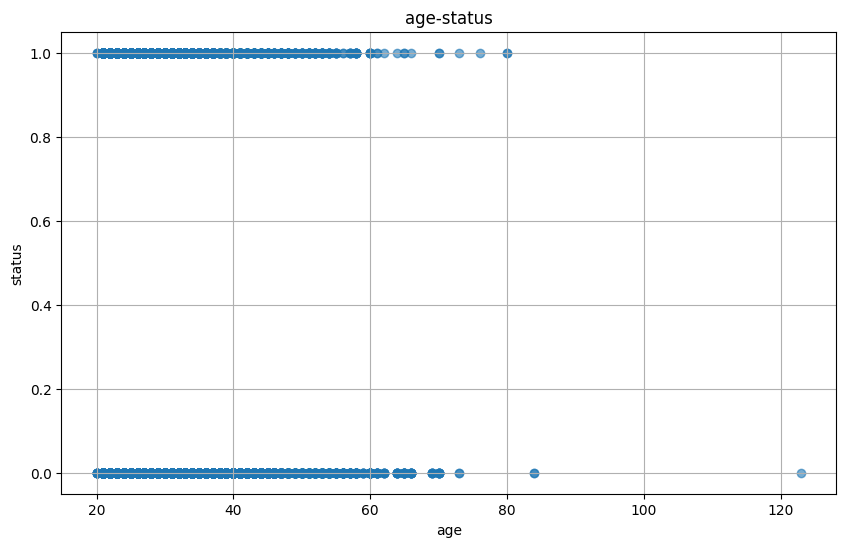

In [7]:
import matplotlib.pyplot as plt

# Plotting the age dependence on the loan status
plt.figure(figsize=(10, 6))
plt.scatter(df['person_age'], df['loan_status'], alpha=0.6)
plt.title('age-status')
plt.xlabel('age')
plt.ylabel('status')
plt.grid(True)
plt.show()

****As you can see on the graph, people over 80-90 do not approve of loans, so you can add the following column 
age_99_quantile = df['person_age'].quantile(0.99997)
    df['age_quantile_99'] = np.where(df['person_age'] > age_99_quantile, 1, 0)

In [8]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_to_income',
       'age_income_interaction', 'loan_to_emp_length_ratio', 'monthly_debt',
       'dti_ratio', 'risk_flag', 'age_quantile_99'],
      dtype='object')

In [9]:
df.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_to_income,age_income_interaction,loan_to_emp_length_ratio,monthly_debt,dti_ratio,risk_flag,age_quantile_99
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,1149.0,17.0,N,14,0,0.001428571428571418,1295000,inf,6245.0,2.1411428571428575,0,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,1335.0,7.000000000000001,N,2,0,0.001428571428571418,1232000,666.6666666666666,4783.333333333333,1.025,0,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,890.0,21.0,N,10,0,-0.0016666666666666496,835200,750.0,4950.0,2.0625,0,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,1111.0,17.0,N,5,0,0.001428571428571418,2100000,857.1428571428571,12110.0,2.076,0,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,692.0,10.0,N,3,0,0.0,1320000,3000.0,3960.0,0.792,0,0


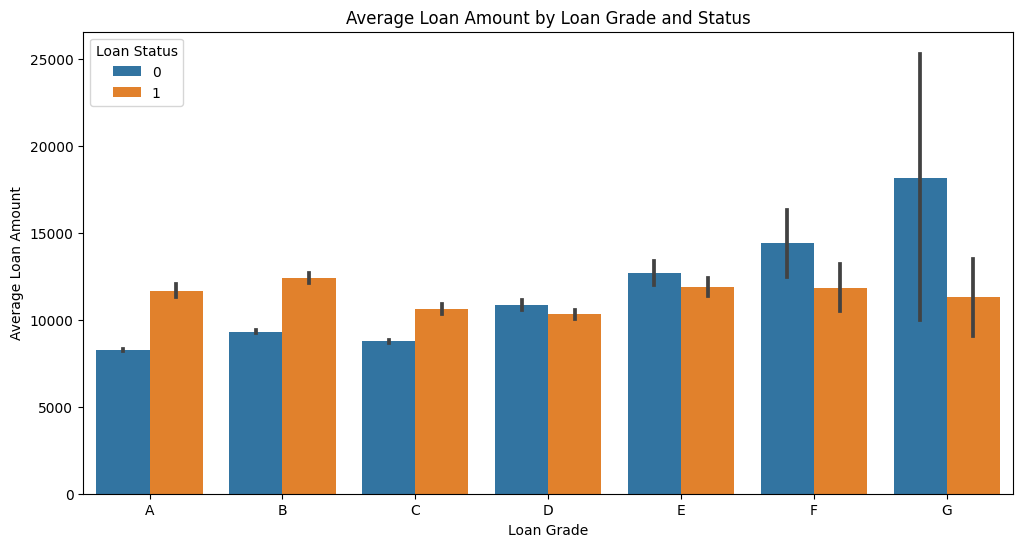

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

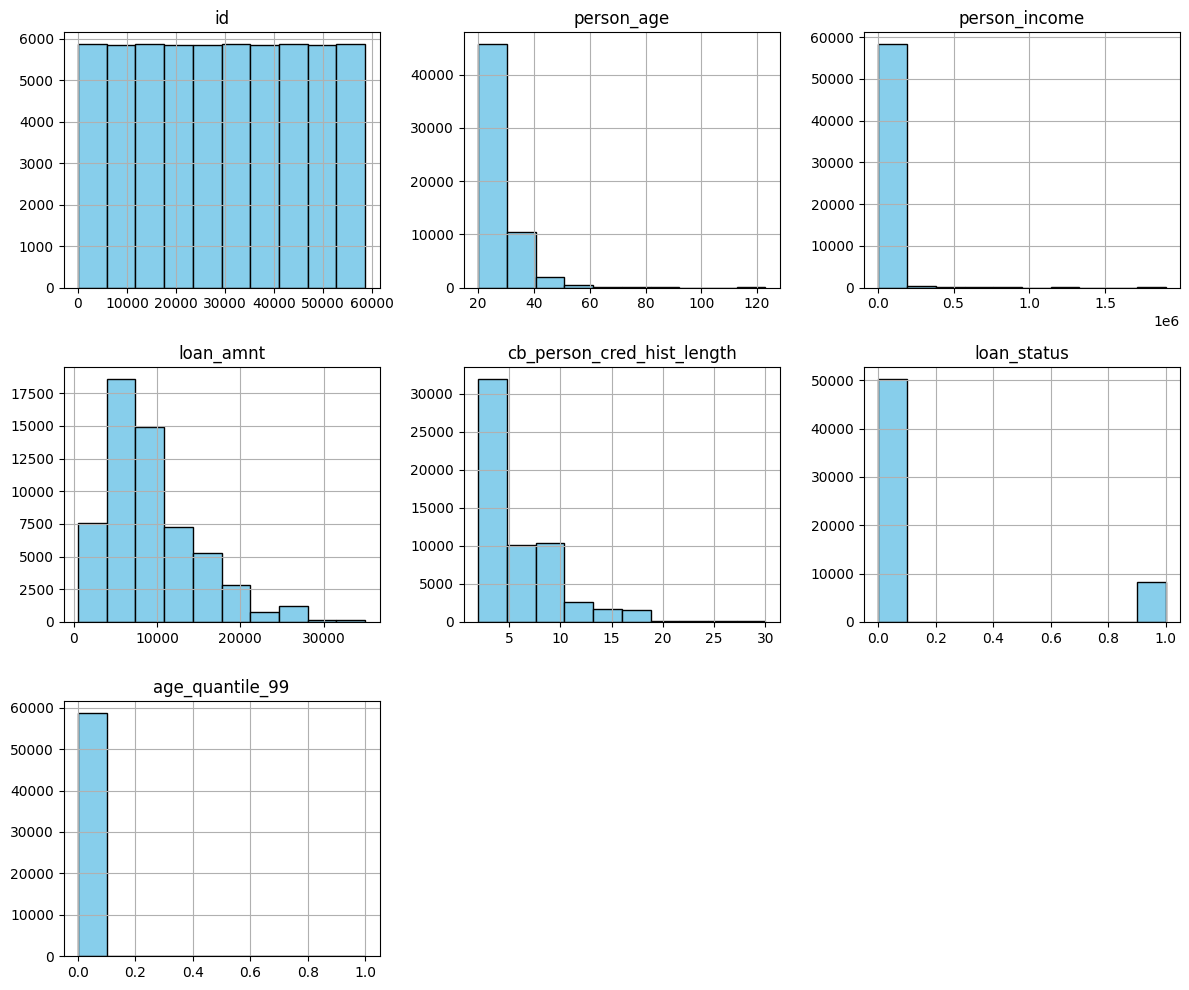

In [12]:
df.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

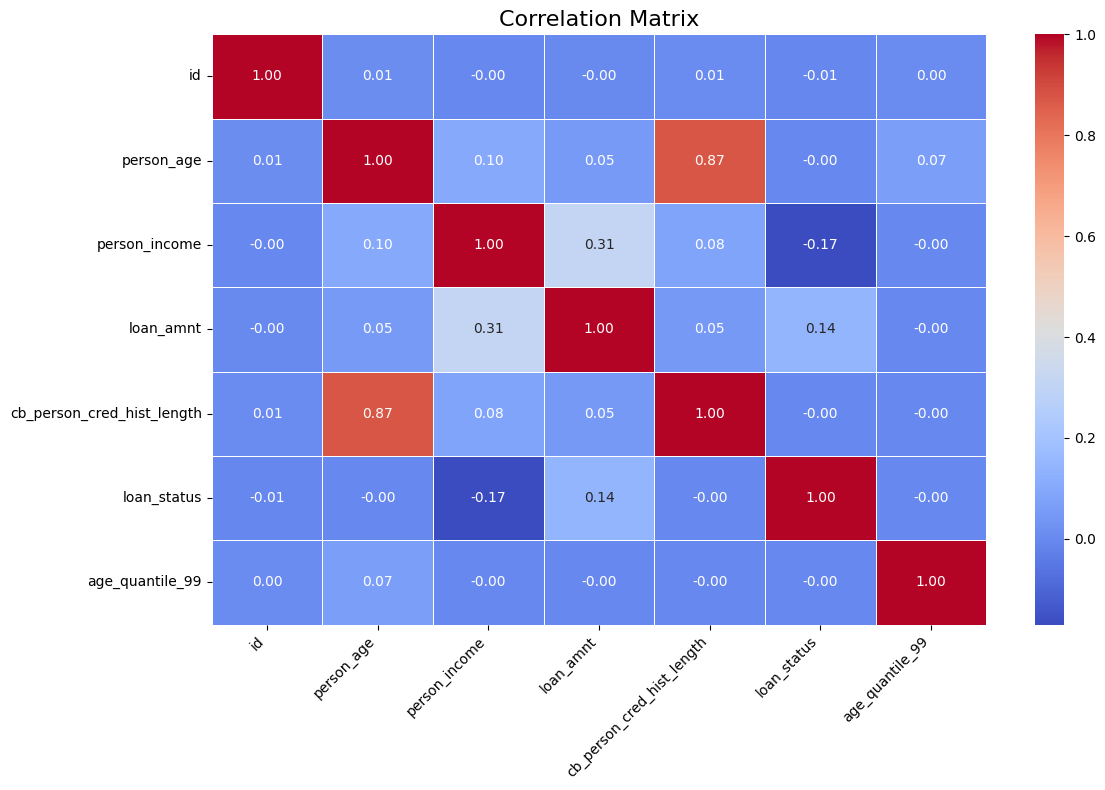

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
num_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
task = Task('binary')
roles = {
    'target': 'loan_status'
}
automl = TabularAutoML(
    task = task,
    timeout = 3000,
    cpu_limit = 6,
    reader_params = {'n_jobs': 6, 'cv': 3, 'random_state': 42}
)
out_of_fold_predictions = automl.fit_predict(df, roles = roles, verbose = 2)
X_test=df.drop('loan_status',axis=1)
y_test=df['loan_status']

[22:17:19] Stdout logging level is INFO2.
[22:17:19] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[22:17:19] Task: binary

[22:17:19] Start automl preset with listed constraints:
[22:17:19] - time: 3000.00 seconds
[22:17:19] - CPU: 6 cores
[22:17:19] - memory: 16 GB

[22:17:19] Train data shape: (58645, 20)



/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


[22:17:27] Layer 1 train process start. Time left 2992.11 secs
[22:17:30] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[22:17:30] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[22:17:32] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[22:17:34] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[22:17:36] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.94311777161454
[22:17:36] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[22:17:36] Time left 2983.66 secs

[22:17:40] Selector_LightGBM fitting and predicting completed
[22:17:43] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[22:17:43] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[22:17:47] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[22:17:50] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[22:17:55] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9633977258724424
[2

In [15]:
from sklearn.metrics import roc_auc_score
test_predictions = automl.predict(X_test).data[:, 0]  # Берем только вероятность класса 1

# Вычисляем ROC-AUC
roc_auc = roc_auc_score(y_test, test_predictions)

print(f"ROC-AUC: {roc_auc:.4f}")


ROC-AUC: 0.9799


In [16]:
kaggle_test_data = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
kaggle_test_data=preprocess(kaggle_test_data)
predictions = automl.predict(kaggle_test_data).data[:, 0]  # .data[:, 0] чтобы получить предсказания в нужном формате

/tmp/ipykernel_30/3108832516.py:39: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  df['risk_flag'] = (np.where((df['cb_person_default_on_file'] == 'Y') & (df['loan_grade'].isin(['C', 'D', 'E'])), 1, 0))


In [17]:
predictions

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,age_income_interaction,loan_to_emp_length_ratio,monthly_debt,dti_ratio,risk_flag,age_quantile_99
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,1576.0,36.0,N,2,0.0023188405797101574,1587000,8333.333333333334,34916.666666666664,6.0724637681159415,0,0
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,1268.0,10.0,Y,4,0.004166666666666666,2496000,1666.6666666666667,11400.0,1.425,1,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,1719.0000000000002,13.0,Y,2,0.003333333333333327,780000,800.0,6063.333333333333,2.425333333333333,1,0
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,890.0,14.000000000000002,N,7,0.0,1650000,1750.0,5775.0,1.386,0,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,1632.0,15.0,Y,4,-0.002941176470588225,2652000,1875.0,21650.0,2.5470588235294116,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,1037.0,10.0,N,4,-0.0038461538461538464,686400,1500.0,2842.5,1.0932692307692307,0,0
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,603.0,15.0,N,3,-0.004166666666666652,1056000,1166.6666666666667,4100.833333333333,1.0252083333333333,0,0
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,751.0,25.0,N,25,0.0,3060000,inf,10637.5,2.1275,0,0
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,1562.0,39.0,Y,4,-0.0011111111111111183,792000,3500.0,19389.999999999996,6.463333333333332,1,0


In [20]:
submission_ids = kaggle_test_data['id']  
# Создайте DataFrame для отправки
submission_df = pd.DataFrame({
    'id': submission_ids,
    'loan_status': predictions  # Убедитесь, что имя колонки совпадает с требованиями соревнования
})
submissions2pred_df = pd.read_csv('/kaggle/input/pss4e10-ensemble-of-solutions/submission.csv')
submission_df['loan_status']=submission_df['loan_status']
#  DataFrame в CSV файл
submission_df.to_csv('submission.csv', index=False)

print("Файл для отправки готов: 'submission2.csv'")

Файл для отправки готов: 'submission2.csv'
